<img src="https://www.colorado.edu/rc/sites/default/files/page/logo.png"
     alt="Logo for Research Computing @ University of Colorado Boulder"
     width="400" />

# Motivating example - processing a large number of images

## Downloading images from Wikimedia Commons

This will download 100 images from wikimedia commons with the search term "cornflower". Any other image library can be used.

In [ ]:
from mediawiki_download_images import download_images

download_images('cornflower', 100)

## Converting images to gray scale 

scikit-image will help us to do that. This is an example for a workload that can be easily parallelized using `ipyparallel`. This will be discussed in the next notebook.

First load some libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys,os,re,time
import urllib

import numpy as np

### Load the skimage library to help processing images

In [3]:
from skimage.io import imread
from skimage.color import rgb2gray

### Define the function that reads an image and converts it to greyscale

In [5]:
def convert2greyscale(path):
    img = imread(path)
    img_gray = rgb2gray(img)
    return img_gray

### Create a list of filenames of the images

In [6]:
import os
pictures_dir = os.path.join('.', 'images', 'cornflower')
pictures = []
for directory, subdirs, files in os.walk(pictures_dir):
    for fname in files:
        if fname.lower().endswith(('.jpg', '.png')):
            pictures.append(os.path.join(directory, fname))

## Convert 16 images to greyscale and time it

Using the cell magic in IPython makes timing really easy.

In [7]:
%%time
converted = []
for p in pictures[:16]:
    converted.append(convert2greyscale(p))

CPU times: user 4.23 s, sys: 2.33 s, total: 6.56 s
Wall time: 6.78 s


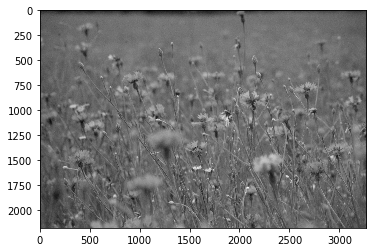

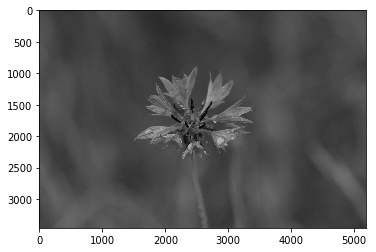

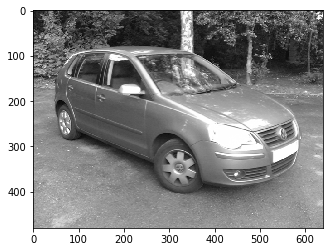

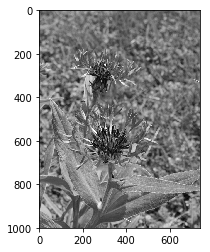

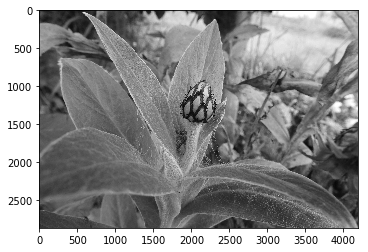

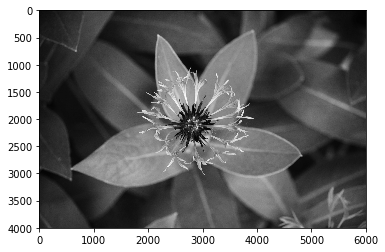

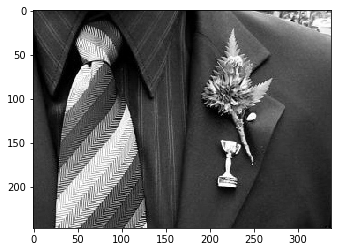

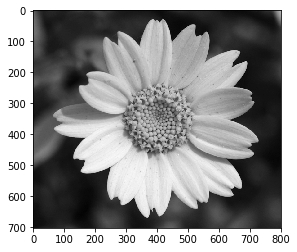

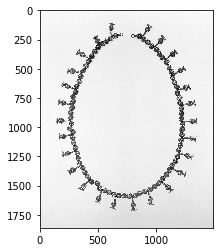

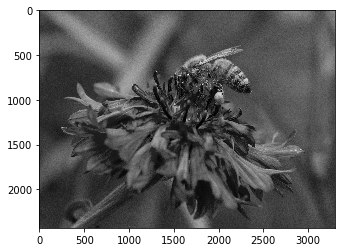

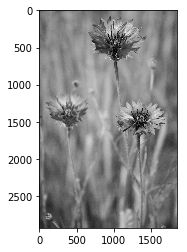

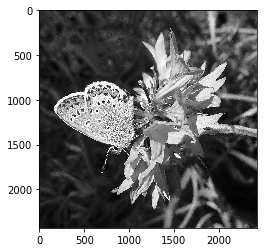

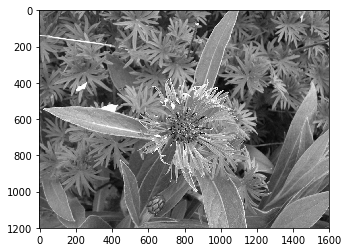

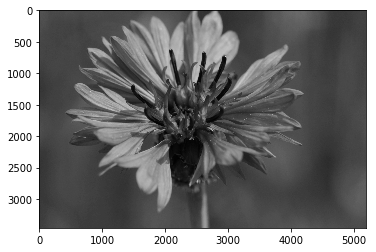

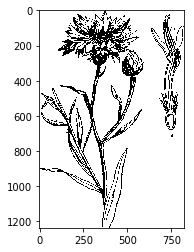

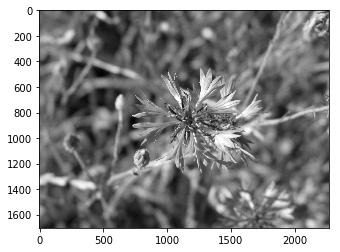

In [12]:
for i in converted:
    plt.imshow(i, cmap='gray')
    plt.show()

### Using functional programming `map`
This avoids the loop, but it returns a map object which is not a list.

In [9]:
%%time
mapresult = map(convert2greyscale, pictures[:16])
print(type(mapresult))

<class 'map'>
CPU times: user 62 µs, sys: 36 µs, total: 98 µs
Wall time: 85.1 µs


What is happening above? The speedup is impossible, but plotting still works.

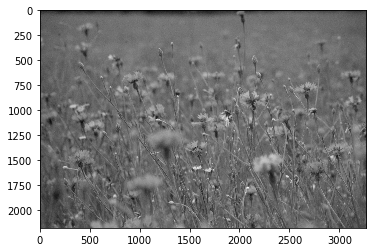

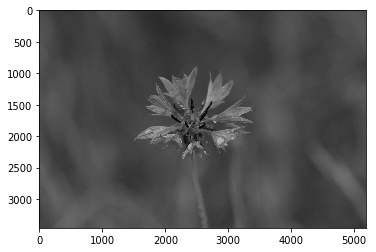

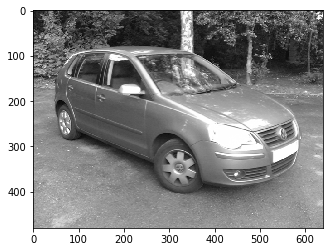

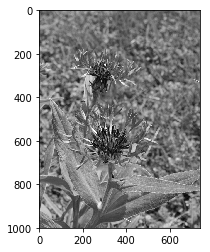

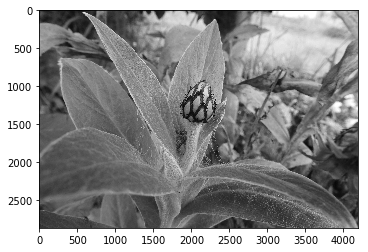

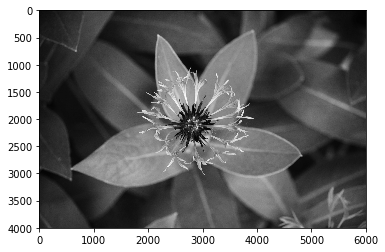

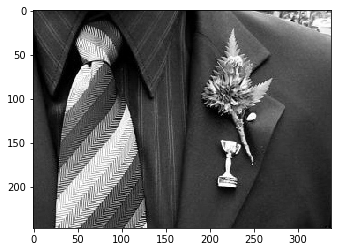

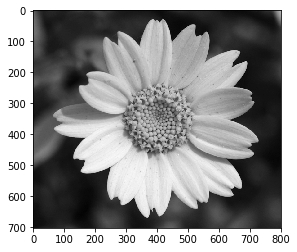

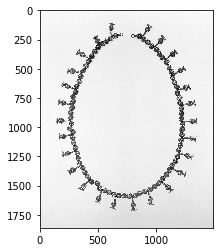

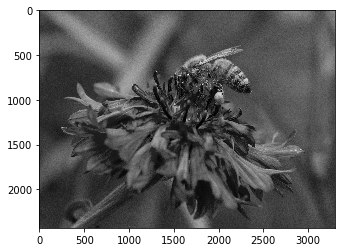

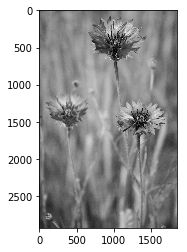

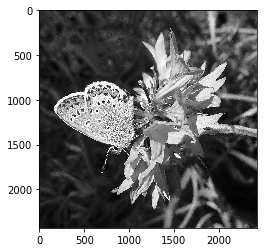

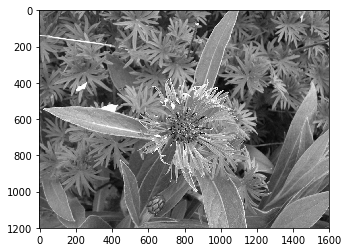

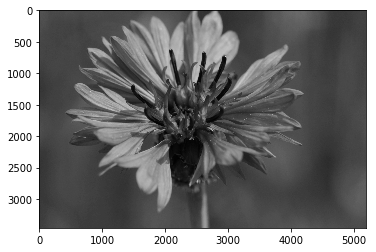

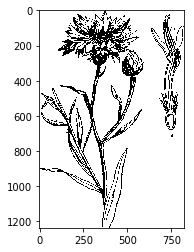

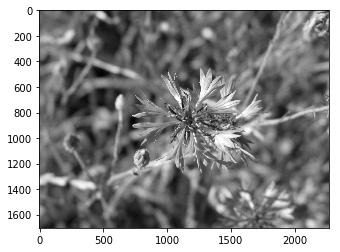

In [13]:
for i in mapresult:
    plt.imshow(i, cmap='gray')
    plt.show()

### Lazy evaluation in python

The timing in the previous section is a result of the lazy evaluation. The map object returned is an iterator and only when the resulting object is accessed the function is evaluated.

See below for a comparable solution to the loop approach.

In [14]:
%%time
mapresult = [*map(convert2greyscale, pictures[:16])]

CPU times: user 4.21 s, sys: 2.3 s, total: 6.51 s
Wall time: 6.68 s


In [15]:
len(mapresult)

16